<a href="https://colab.research.google.com/github/FaizanFarooq3/Financial-Analytics-with-Python/blob/main/Portfolio_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating a Simple Portfolio using Python**
In this project, focus will be on creating a sample portfolio and finding out portfolio simple returns, get daily returns, volatility, etc.The data is extracted from Yahoo Finance using Pandas Data Reader.



### Importing the necessary libraries

In [1]:
!pip install pandas--datareader --upgrade

In [14]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### Lets start creating our portfolio

In [31]:
# getting the stocks symbols for our portfolio
## FAANG

stocksymbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [16]:
# Getting the stock starting date
## I have took this starting date because Facebook did not have an Initial Public Offering(IPL) since mid 2012

stockStartDate = '2013-01-01'

In [19]:
# Getting todays date and formatting into "YYYY-mm-dd"

today = datetime.today().strftime("%Y-%m-%d")
print(today)

2024-08-18


In [20]:
today = '2021-09-08'

In [21]:
# Get the number of assets in the portfolio

numAssets = len(stocksymbols)
print("You have " + str(numAssets) + " assets in your portfolio." )

You have 5 assets in your portfolio.


In [22]:
# Lets create a function to get the stock prices in the portfolio

def getMyPortfolio(stocks = stocksymbols, start = stockStartDate, end = today, col = "Adj Close"):
  data = web.DataReader(stocks, data_source = 'yahoo', start = start, end = end)[col]
  return data

In [27]:
# Lets create a function to get the stock prices in the portfolio

def getMyPortfolio(stocks = stocksymbols, start = stockStartDate, end = today, col = "Adj Close"):
  data = yf.download(stocks, start = start, end = end)[col] # Use yfinance to download data
  return data

In [33]:
# Replacing 'FB' with 'META' in the stocksymbols list
stocksymbols = [stock.replace('FB', 'META') for stock in stocksymbols]


In [34]:
# Lets get the stock portfolio Adj Close price

my_stocks = getMyPortfolio(stocksymbols)
my_stocks

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,16.705702,12.865500,17.993254,27.942581,13.144286
2013-01-03,16.494839,12.924000,18.003704,27.713053,13.798571
2013-01-04,16.035381,12.957500,18.359463,28.701021,13.711429
2013-01-07,15.941056,13.423000,18.279356,29.359669,14.171429
2013-01-08,15.983955,13.319000,18.243282,29.000406,13.880000
...,...,...,...,...,...
2021-08-31,149.329391,173.539505,145.296661,378.601990,569.190002
2021-09-01,149.998199,173.949997,145.676224,381.266510,582.070007
2021-09-02,151.119415,173.156006,144.055069,374.510406,588.549988


In [35]:
# lets create a function to visualize the portfolio

def showGraph(stocks = stocksymbols, start = stockStartDate, end = today, col = "Adj Close"):

  # Creating a title for the portfolio
  title = "Portfolio " + col + " Price History"

  # Get the stocks
  my_stocks = getMyPortfolio(stocks = stocks, start = start, end = end, col = col)

  # Give the figure size
  plt.figure(figsize = (12.2,4.5))

  # Lets loop through each stock and plot the price
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

  plt.title(title)
  plt.xlabel("Date", fontsize = 18)
  plt.ylabel(col + " Price USD ($)", fontsize = 18)
  plt.legend(my_stocks.columns.values, loc = "upper left")
  plt.show();

[*********************100%%**********************]  5 of 5 completed


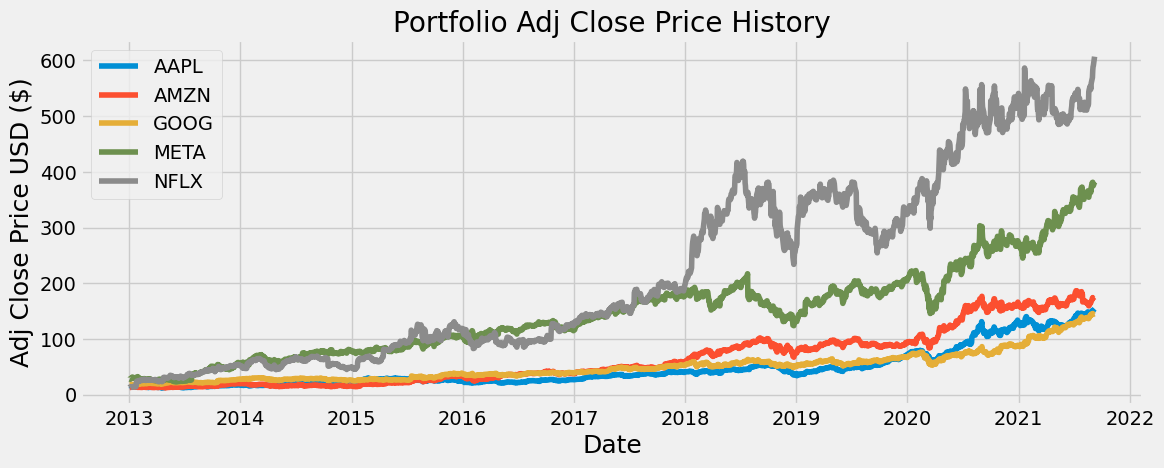

In [36]:
# Lets check the Adjusted stock price for FAANG

showGraph(stocksymbols)

Stock prices for Amazon was above $2000 for the years 2018 and later.

In [37]:
# Lets calculate the simple returns
## formula = (New price/old price) - 1


daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.004547,0.000581,-0.008214,0.049777
2013-01-04,-0.027855,0.002592,0.019760,0.035650,-0.006315
2013-01-07,-0.005882,0.035925,-0.004363,0.022949,0.033549
2013-01-08,0.002691,-0.007748,-0.001973,-0.012237,-0.020565
...,...,...,...,...,...
2021-08-31,-0.008425,0.014385,-0.000052,-0.003363,0.005316
2021-09-01,0.004479,0.002365,0.002612,0.007038,0.022629
2021-09-02,0.007475,-0.004564,-0.011128,-0.017720,0.011133


In [38]:
# Lets see the stock correlations

daily_simple_returns.corr()

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,1.000000,0.461952,0.526135,0.460885,0.276379
AMZN,0.461952,1.000000,0.602812,0.522609,0.452427
GOOG,0.526135,0.602812,1.000000,0.572428,0.415459
META,0.460885,0.522609,0.572428,1.000000,0.362367
NFLX,0.276379,0.452427,0.415459,0.362367,1.000000


In [39]:
# Covariance matrix for simple returns

daily_simple_returns.cov()

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,0.000319,0.000157,0.000151,0.000177,0.000140
AMZN,0.000157,0.000363,0.000185,0.000213,0.000245
GOOG,0.000151,0.000185,0.000259,0.000198,0.000190
META,0.000177,0.000213,0.000198,0.000460,0.000221
NFLX,0.000140,0.000245,0.000190,0.000221,0.000807


Here, the diagonal elements show the variance which shows the spread from mean. The higher the variance of asset price, the higher the risk, higher the return and higher the volatility. The lower the variance, the lower the risk, lower the return and lower the volatility. The other elements in the matrix indicates the covariance.

In [40]:
# Lets see only the variances

daily_simple_returns.var()

,0
Ticker,
AAPL,0.000319
AMZN,0.000363
GOOG,0.000259
META,0.000460
NFLX,0.000807


In [41]:
# Standard Deviation for daily simple returns(Stock volatility)

print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


,0
Ticker,
AAPL,0.017872
AMZN,0.019040
GOOG,0.016095
META,0.021450
NFLX,0.028410


We can see the most volatile stock is Netflix and the least volatile stock is Google. The higher the volatility the higher the return.

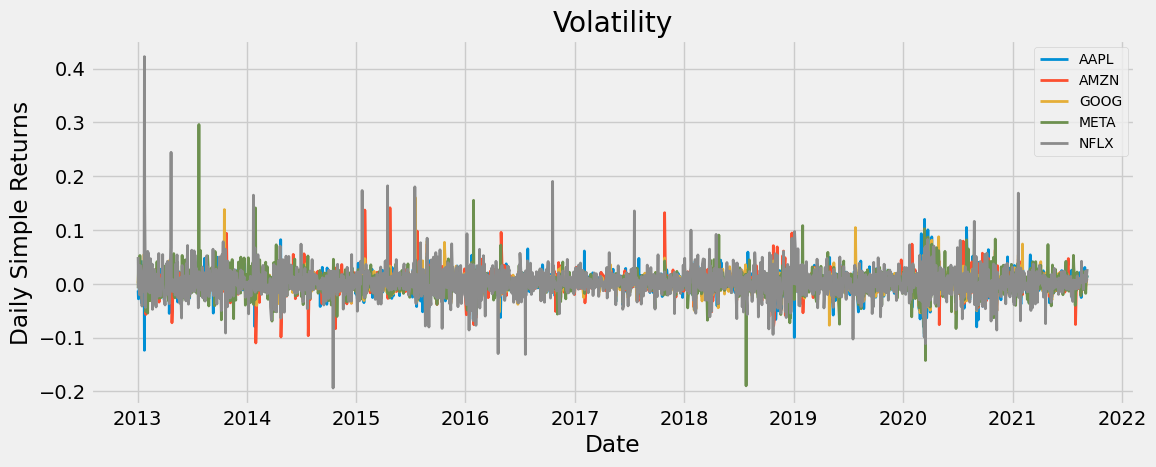

In [42]:
# Lets visualize the stocks daily returns/Volatility

plt.figure(figsize = (12,4.5))

# Loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[c], lw = 2, label = c)

# Create a legend
plt.legend(loc = "upper right", fontsize = 10)
plt.title("Volatility")
plt.ylabel("Daily Simple Returns")
plt.xlabel("Date")
plt.show()

We can see that Netflix is quite volatile.

In [43]:
# Lets calculate the mean of the Daily Simple Returns

dailyMeanSimpleReturn = daily_simple_returns.mean()

# Print
print("The Daily Mean Simple Return is:")
print(dailyMeanSimpleReturn)

The Daily Mean Simple Return is:
Ticker
AAPL    0.001178
AMZN    0.001377
GOOG    0.001085
META    0.001424
NFLX    0.002145
dtype: float64


In [44]:
# Lets calculate the Expected Portfolio Daily Return
# Lets suppose we invest 40% META, 10% AMZN, 30% AAPL, 10 NFLX, 10% GOOG of our portfolio

randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1])

portfolioSimpleReturns = np.sum(randomWeights * dailyMeanSimpleReturn)

print("The Daily Expected Portfolio return is " + str(portfolioSimpleReturns))

The Daily Expected Portfolio return is 0.0012911590142657124


In [45]:
# Lets get the yearly simple returns

print("Expected Annualised Portfolio Simple Return is " + str(portfolioSimpleReturns * 252))

Expected Annualised Portfolio Simple Return is 0.3253720715949595


Out of 365 days in the year 2021, 104 days are weekend days (Saturday and Sunday) when the stock exchanges stay closed. Apart from the weekends, there are 13 holidays in 2021. Hence, there are 252 trading days. With these weights we can expect a 35% return on our stocks.

In [46]:
# Lets calculate the growth on the investment

dailyCumSimplReturns = (daily_simple_returns + 1).cumprod()
dailyCumSimplReturns

Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.987378,1.004547,1.000581,0.991786,1.049777
2013-01-04,0.959875,1.007151,1.020353,1.027143,1.043147
2013-01-07,0.954228,1.043333,1.015901,1.050714,1.078144
2013-01-08,0.956796,1.035249,1.013896,1.037857,1.055972
...,...,...,...,...,...
2021-08-31,8.938828,13.488749,8.075063,13.549285,43.303227
2021-09-01,8.978862,13.520655,8.096158,13.644642,44.283120
2021-09-02,9.045978,13.458941,8.006060,13.402857,44.776109


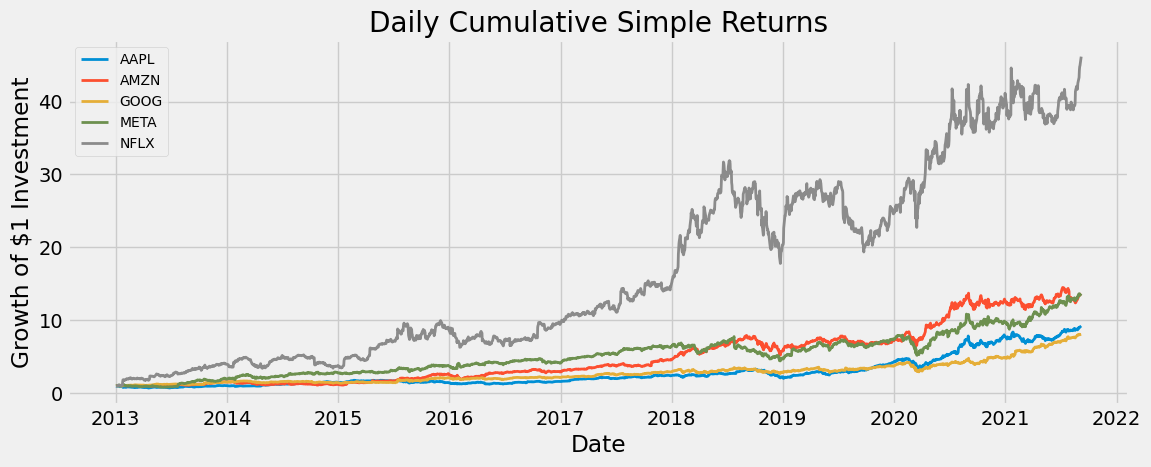

In [47]:
# Visualize the daily cumulative simple return

plt.figure(figsize = (12.2,4.5))
for c in dailyCumSimplReturns.columns.values:
  plt.plot(dailyCumSimplReturns.index, dailyCumSimplReturns[c], lw =2, label = c)

plt.legend(loc = "upper left", fontsize = 10)
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.title("Daily Cumulative Simple Returns")
plt.show();

We can see that if we have invested a dollar in Netflix stocks in 2013, it would have given a return of 40% now in 2021. Similarly, for Google it would have given back a return of less than 10% in 2021.